# This file can be used to plot Figure 5.c and 5.d of the paper.

In [1]:
from ordered_set import OrderedSet
import wandb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

font_size = 14
font_size_legend = 14
font_size_title = 8

plt.rc('font', size=font_size)  # controls default text sizes
plt.rc('axes', titlesize=font_size_title)  # fontsize of the axes title
plt.rc('axes', labelsize=font_size)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_size)  # fontsize of the tick labels
plt.rc('ytick', labelsize=font_size)  # fontsize of the tick labels
plt.rc('legend', fontsize=font_size_legend)  # legend fontsize
plt.rc('figure', titlesize=font_size_title)  # fontsize of the figure title
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 80 

csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}

methods_ids = [None]

api = wandb.Api()

path_prefix = "akileshbadrinaaraayanan/ContPlay_Hanabi_complete/"


methods_ids[0] = {'ER_hard_SGD_32':["28952wnc", "wp1p4com"],
                  'ER_hard_SGD_8':[ "2ln7s1zm","1m4m6rtb","3k03rxnv"],
                  'ER_hard_SGD_2':[ "v3zblag1","zedsg8u3","1dptoe8u"],
               'ER_hard_Adam_32': ["3g7sutwt", "o43sxn85"],
                'ER_hard_Adam_8': [ "zd5fstfs","4fz0ndy6","zogwsjtw"],
                'ER_hard_Adam_2': [ "kod6anu4","1k74x5z4","bdiadk3h"],
                  
                'ER_hard_Adam_200': ["3kp3bm8v","3kkyqmt6"],
                'ER_hard_Adam_50': [ "3g7sutwt", "o43sxn85"],
                'ER_hard_Adam_10': [ "24j8s35u","giz2dqbq"],
                  'ER_hard_Adam_2': [ "q5fw650i","2glq41g3"],                
               }

In [2]:
results_dict = [{}]
for i in range(1):
    for method in methods_ids[i].keys():
        all_results, all_configs = [], []
        for seed in range(len(methods_ids[i][method])):
            run = api.run(path_prefix + methods_ids[i][method][seed])
            history = run.scan_history()

            results = {key:[] for key in run.history().columns}
            for row in history:
                for key in row.keys():
                    results[key].append(row[key])
            results['epoch_zeroshot'] = OrderedSet(results['epoch_zeroshot'])
            all_results.append(results)
            all_configs.append(run.config)
        results_dict[i][method] = all_results
        results_dict[i][method+'_configs'] = all_configs

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


HARD agents, forgetting_zs_1


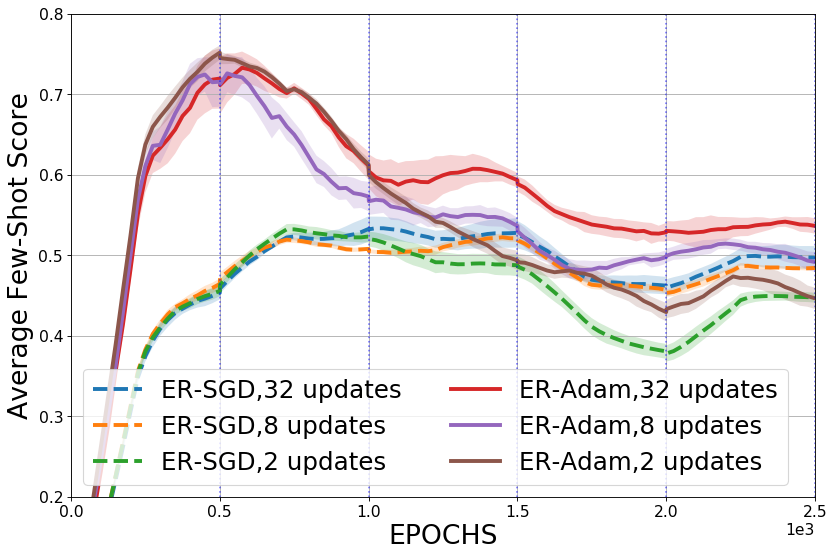

In [3]:
num_tasks = 5
task_length = 500
Agent_types = ['HARD']
y_labels = ["Average Few-Shot Score"]

x_axises = ["epoch_zeroshot"]

abl_study = "EpisodicMemory"
methods_to_plot = [['ER_hard_SGD_32',
                  'ER_hard_SGD_8',
                  'ER_hard_SGD_2',
               'ER_hard_Adam_32',
                'ER_hard_Adam_8',
                'ER_hard_Adam_2',
               ]]

# abl_study = "eval_steps"
# methods_to_plot = [['ER_hard_Adam_200',
#                 'ER_hard_Adam_50',
#                 'ER_hard_Adam_10',
#                   'ER_hard_Adam_2',   
#                ]]



for k in range(len(Agent_types)):
    if not os.path.exists('plots/full_cruves/' + Agent_types[k]):
        os.makedirs('plots/full_cruves/' + Agent_types[k])
    fig = plt.figure(figsize=(12,8))
    ax = fig.subplots(nrows=1, ncols=1)
    
    for method in methods_to_plot[k]:
        if len(results_dict[k][method]) > 0:
            if len(method.split('_')) == 4:
                label = method.split('_')[0] + '-' + method.split('_')[2] + ',' + method.split('_')[3] + ' updates'

            y = np.zeros((2, len(results_dict[k][method][0][x_axises[0]])))
            i = 0
            for s in range(2):
                for metric in results_dict[k][method][s].keys():
                    if metric == 'avg_fs_score':
                        y[s, :len(results_dict[k][method][s][metric])] = np.array(results_dict[k][method][s][metric]) / 25

            if method.split('_')[-2] == 'SGD':
                ls = '--'
            elif method.split('_')[-2] == 'Adam':
                ls = '-'
            N = 10
            y_mean = np.convolve(y.mean(axis=0), np.ones(N)/N, mode='full')[:-N+1]
            y_std = np.convolve(y.std(axis=0), np.ones(N)/N, mode='full')[:-N+1]
            
            ax.plot(results_dict[k][method][0][x_axises[0]],  y_mean, ls, alpha=1, lw=3.5, label=label)
            ax.fill_between(results_dict[k][method][0][x_axises[0]], y_mean - y_std, y_mean + y_std,alpha=0.2)

    for i in range(num_tasks):
        plt.plot([task_length*(i+1)]*50, np.linspace(0, 25, 50), 'b:', alpha=0.5)
    
    ax.set_ylim([0.2, 0.8])
    ax.set_xlim([0, 2.5e3])

    ax.grid()
    ax.set_xlabel('EPOCHS', **hfont)
    ax.set_ylabel(y_labels[0], **hfont)
    ax.xaxis.label.set_fontsize(24)
    ax.yaxis.label.set_fontsize(24)
    print(Agent_types[k] + ' agents, ' + metric)
    ax.legend(loc='best', ncol=2, prop={'size': 22})
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

#     plt.savefig('plots/full_cruves/' + Agent_types[k] + '/' + 'Abl_' + abl_study +'.png', dpi=200)
    plt.show()
